In [144]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [145]:
from fastai2.vision.all import *

In [146]:
path = '/home/ubuntu/crop/data_v1'

In [147]:
dls = ImageDataLoaders.from_folder(path, train='train', valid_pct=0.01,item_tfms=Resize(128),
                                   bs=64, num_workers=32)

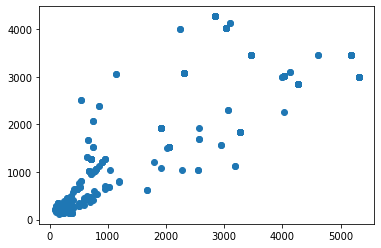

In [148]:
train_data = [i[0].size for i in dls.train_ds[:]]; td = np.array(train_data)
plt.scatter(td[:, 0], td[:, 1])

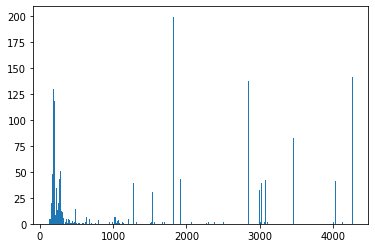

In [149]:
dt = plt.hist(td[:, 1], bins=300)

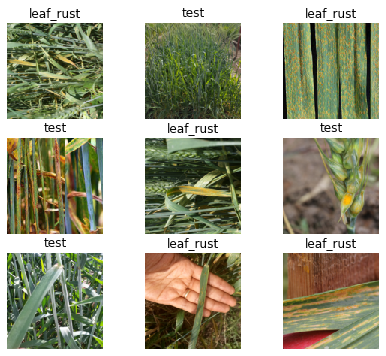

In [150]:
dls.show_batch(max_n=9, figsize=(7,6))

In [151]:
print(dls.vocab)
len(dls.vocab),dls.c

(#4) ['healthy_wheat','leaf_rust','stem_rust','test']


(4, 4)

In [152]:
learn = cnn_learner(dls, resnet34, metrics=error_rate).to_fp16()

In [153]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,2.229761,1.875096,0.714286,00:53
